### Promises from status update 10/26...

Additionally, we've started working on 
- methods of cleaning, transforming, and visualizing our data 
- exploratory analysis (via, e.g. word clouds, plots of various statistics, etc.) 

#### numeric figures:
- histogram of medDuration
- histogram of satisfaction, genRating, satisfaction/genRating
- scatter of medDuration v. rating [x = meddur, y = counts, 
- bar chart of other drugs mentioned in review?
- word cloud
- bar chart of condition specs
- scatter of rating v. upvotes @check

In [311]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [312]:
abilify = pickle.load( open( "abilify.p", "rb" ) )
reviews = abilify

In [314]:
for review in reviews:
    # fix ageRange to interval
    try:
        temp_ar = review['ageRange'].split('-')
        review['ageRange'] = [int(temp_ar[0]), int(temp_ar[1])]
    except:
        if type(review['ageRange']) != type([]):
#             print(review['ageRange'])
            continue
            
    # fix medDuration to interval of months **[, ) interval
    try:
        temp_md = review['medDuration'].split('less than ') # "less than 1 month", :"x to less than y years"
        temp_md2 = temp_md[-1].split(' ')
        if temp_md2[-1]== 'years': # x to less than y years
            beg_num = int(temp_md[0].split(' ')[0])*12
            end_num = int(temp_md2[0]) *12
        elif temp_md2[-1] == 'month': # less than 1 month
            beg_num = 0
            end_num = 1
        elif temp_md2[-1] == 'months': # x to y months
            temp_md = review['medDuration'].split(' to ')
            beg_num = int(temp_md[0])
            end_num = int(temp_md[1].split(' ')[0])
        review['medDuration_int'] = [beg_num, end_num]
        review['medDuration'] = str([beg_num, end_num])
    except:
        if type(review['medDuration']) != type([]):
#             print('wait, what?', review['medDuration'])
            continue
        
    for value in ['effectiveness', 'ease_of_use', 'satisfaction', 'genRating','upVotes']:
        try:
            review[value] = int(review[value])
        except:
            continue        

In [315]:
reviews_df = pd.DataFrame(reviews)

In [316]:
import numpy as np

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

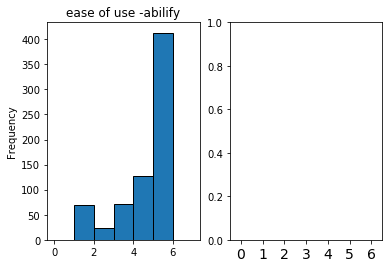

In [317]:

fig, ((ax1, ax2)) = plt.subplots(1,2)
bins = range(8)
bins_labels(bins, fontsize=14)
reviews_df['ease_of_use'].plot.hist(bins = bins, edgecolor="k", ax = ax1)
ax1.set_title('ease of use -abilify')

# reviews_df['ease_of_use'].plot.box()

In [ ]:
reviews_df[['ease_of_use', 'upVotes']]

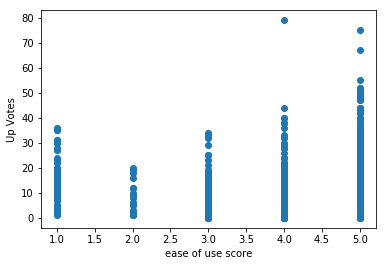

In [318]:
plt.scatter(reviews_df.ease_of_use, reviews_df.upVotes)
plt.xlabel('ease of use score')
plt.ylabel('Up Votes')

In [319]:
meddur = reviews_df.groupby(by = ['medDuration'])
meddur.groups.keys()

dict_keys(['[0, 1]', '[1, 6]', '[12, 24]', '[24, 60]', '[60, 120]'])

In [320]:
conversion_to = {key:ik for ik, key in enumerate(meddur.groups.keys())}
conversion_back = {ik:key for ik, key in enumerate(meddur.groups.keys())}

medDuration
[0, 1]       Axes(0.125,0.125;0.775x0.755)
[1, 6]       Axes(0.125,0.125;0.775x0.755)
[12, 24]     Axes(0.125,0.125;0.775x0.755)
[24, 60]     Axes(0.125,0.125;0.775x0.755)
[60, 120]    Axes(0.125,0.125;0.775x0.755)
Name: ease_of_use, dtype: object

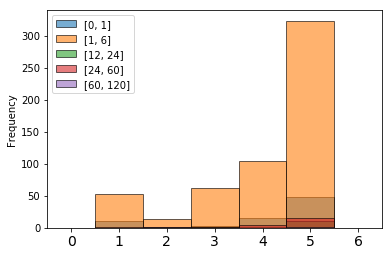

In [321]:
# reviews_df.groupby('medDuration').ease_of_use.hist(stacked = False)

def hist(x):
    h, e = np.histogram(x.dropna(), range=(0, 10))
    e = e.astype(int)
    return pd.Series(h, zip(e[:-1], e[1:]))

kw = dict(stacked=True, width=1, rot=45)
bins = range(8)
bins_labels(bins, fontsize=14)
reviews_df.groupby('medDuration').ease_of_use.plot.hist(stacked = False, alpha = .6, bins = bins, edgecolor="k", legend = True)#(**kw)



# reviews_df['ease_of_use'].plot.hist(bins = bins, edgecolor="k", ax = ax1)
# ax1.set_title('ease of use -abilify')

In [333]:
def make_hist(tag):
    kw = dict(stacked=True, width=1, rot=45)
    bins = range(8)
    bins_labels(bins, fontsize=14)

#     tag = 'ease_of_use'
    plt.hist(reviews_df[reviews_df["medDuration"]=='[0, 1]'][tag].reset_index(drop=True), alpha=0.6, label='[0, 1]', bins = bins, edgecolor="k")
    plt.hist(reviews_df[reviews_df["medDuration"]=='[1, 6]'][tag].reset_index(drop=True), alpha=0.6, label="[1, 6]", bins = bins, edgecolor="k", width=.35)
    plt.hist(reviews_df[reviews_df["medDuration"]=='[12, 24]'][tag].reset_index(drop=True), alpha=0.6, label="[12, 24]", bins = bins, edgecolor="k", width =.45)
    plt.hist(reviews_df[reviews_df["medDuration"]=='[24, 60]'][tag].reset_index(drop=True), alpha=0.6, label="[24, 60]", bins = bins, edgecolor="k", width=.25)
    plt.hist(reviews_df[reviews_df["medDuration"]=='[60, 120]'][tag].reset_index(drop=True), alpha=0.6, label="[60, 120]", bins = bins, edgecolor="k", width=.85)


    plt.legend(loc = 'best')
    # plt.axes = [[0,1],[0,10]]
    plt.axis([0.5, 6.5, 0, 350])
    plt.xlabel(tag+' rating')
    plt.ylabel('count')
    

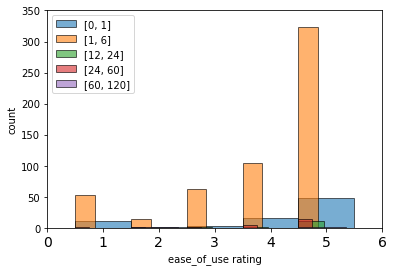

In [334]:
make_hist('ease_of_use')

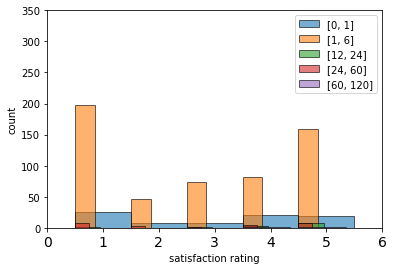

In [335]:
make_hist('satisfaction')

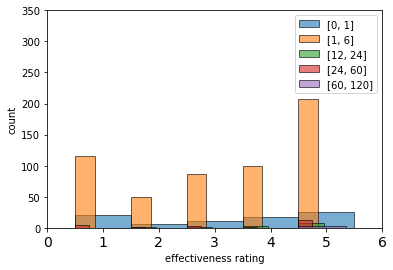

In [336]:
make_hist('effectiveness')

In [337]:
grouped =reviews_df.groupby(['medDuration', 'satisfaction'])
grouped.describe()

ease_of_use                                      \
                               count      mean       std  min   25%  50%   
medDuration satisfaction                                                   
[0, 1]      1                   25.0  2.880000  1.786990  1.0  1.00  3.0   
            2                    8.0  4.250000  1.388730  1.0  4.00  5.0   
            3                    8.0  4.625000  0.517549  4.0  4.00  5.0   
            4                   20.0  4.500000  0.606977  3.0  4.00  5.0   
            5                   19.0  5.000000  0.000000  5.0  5.00  5.0   
[1, 6]      1                  198.0  3.323232  1.585648  1.0  1.00  4.0   
            2                   47.0  3.638298  1.150152  1.0  3.00  4.0   
            3                   73.0  4.465753  0.708719  3.0  4.00  5.0   
            4                   81.0  4.592593  0.586894  3.0  4.00  5.0   
            5                  159.0  4.905660  0.417837  2.0  5.00  5.0   
[12, 24]    1                    2.0  4.000000  1.414214  3.0  3.50  4.0   
            3                    2.0  5.000000  0.000000  5.0  5.00  5.0   
            4                    3.0  4.666667  0.577350  4.0  4.50  5.0   
            5                    7.0  4.714286  0.755929  3.0  5.00  5.0   
[24, 60]    1                    7.0  3.285714  1.704336  1.0  2.00  4.0   
            2                    3.0  3.666667  1.527525  2.0  3.00  4.0   
            3                    2.0  5.000000  0.000000  5.0  5.00  5.0   
            4                    5.0  4.200000  1.303840  2.0  4.00  5.0   
            5                    7.0  5.000000  0.000000  5.0  5.00  5.0   
[60, 120]   4                    1.0  5.000000       NaN  5.0  5.00  5.0   
            5                    2.0  3.500000  2.121320  2.0  2.75  3.5   

                                    effectiveness            ...              \
                           75%  max         count      mean  ...    75%  max   
medDuration satisfaction                                     ...               
[0, 1]      1             5.00  5.0          25.0  1.440000  ...   1.00  5.0   
            2             5.00  5.0           8.0  3.125000  ...   3.25  5.0   
            3             5.00  5.0           8.0  3.125000  ...   3.25  4.0   
            4             5.00  5.0          20.0  4.200000  ...   5.00  5.0   
            5             5.00  5.0          19.0  4.894737  ...   5.00  5.0   
[1, 6]      1             5.00  5.0         198.0  1.969697  ...   3.00  5.0   
            2             5.00  5.0          47.0  2.893617  ...   4.00  5.0   
            3             5.00  5.0          73.0  3.547945  ...   4.00  5.0   
            4             5.00  5.0          81.0  4.234568  ...   5.00  5.0   
            5             5.00  5.0         159.0  4.905660  ...   5.00  5.0   
[12, 24]    1             4.50  5.0           2.0  4.500000  ...   4.75  5.0   
            3             5.00  5.0           2.0  3.000000  ...   3.50  4.0   
            4             5.00  5.0           3.0  4.000000  ...   4.50  5.0   
            5             5.00  5.0           7.0  4.714286  ...   5.00  5.0   
[24, 60]    1             4.50  5.0           7.0  1.857143  ...   2.00  5.0   
            2             4.50  5.0           3.0  2.333333  ...   2.50  3.0   
            3             5.00  5.0           2.0  4.500000  ...   4.75  5.0   
            4             5.00  5.0           5.0  4.400000  ...   5.00  5.0   
            5             5.00  5.0           7.0  5.000000  ...   5.00  5.0   
[60, 120]   4             5.00  5.0           1.0  5.000000  ...   5.00  5.0   
            5             4.25  5.0           2.0  5.000000  ...   5.00  5.0   

                         upVotes                                           \
                           count       mean        std   min    25%   50%   
medDuration satisfaction                                                    
[0, 1]      1               25.0  12.160000   7.

In [338]:
coded_meddur = []
satisfaction = []
for ik in range(len(reviews_df['medDuration'])):
    try:
        coded_meddur.append(conversion_to[reviews_df['medDuration'].iloc[ik]])
        satisfaction.append(reviews_df['satisfaction'].iloc[ik])
    except: 
        continue

In [ ]:
plt.scatter(coded_meddur,satisfaction, alpha = .03 )
plt.xticks(coded_meddur, [conversion_back[tick] for tick in coded_meddur])
plt.xlabel('medication duration (months)')
plt.ylabel('satisfaction rating')